# Multiple Linear Regression Project with Housing Data

**Project objective**

In this project I have built a multiple linear regression model which will be able to accurately predict house prices in the area of the dataset - King County. First, I explore and clean the data. Then I move to feature selection and engineering. At the end I build and compare several models and select the optimal one. 


**About the dataset**

The dataset consists of data from Zillow on house prices and house features in King County, Washington. It contains information, such as the number of bedrooms and bathrooms, size of living area and the adjecent lot, number of floors, condition and zipcode. 

## 1) Obtaining data and loading libraries

In [90]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

df = pd.read_csv('kc_house_data.csv')

#Inital look at df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [91]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Initial observations:
* the dataframe has 21597 rows and 21 colums with various data types
* columns waterfront, view and yr_renovated have missing values

## 2) Data cleaning + Data Exploration

### Dealing with missing values

In [92]:
#YR_RENOVATED
print(df.yr_renovated.value_counts().head())

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64


* 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
* there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value
* I will later make this columns categorical and bin the values

In [93]:
df.yr_renovated = df.yr_renovated.astype('str')
df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

In [94]:
print(df.yr_renovated.isna().sum())

0


In [96]:
#VIEW
# I will later make this columns categorical 

print(df.view.value_counts())
df.view = df.view.fillna(0.0)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


* this columns has 63 NaNs
* the overwhelming value in this column is 0 (19 422 out of 21 597)
* I will turn the missing values into '0'
* I will later make this columns categorical 

In [97]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now we no longer have missing values in the dataset

### Looking for placeholders

Now I will inspect whether the dataset contains any placeholder values. I will do this by looking at value_counts result for each column. This will allow me to detect any invalid values.  I will later use scatter plots to look for outliers.

In [98]:
for var in list(df.columns):
    print (df[var].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

Name: lat, Length: 5033, dtype: int64
-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.172     94
-122.365     94
-122.306     93
-122.346     93
-122.351     92
-122.304     92
-122.348     92
-122.299     92
-122.375     92
-122.295     91
-122.350     90
-122.285     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.317     86
-122.316     86
-122.301     86
           ... 
-122.454      1
-121.835      1
-122.519      1
-122.469      1
-121.788      1
-121.891      1
-121.325      1
-122.447      1
-121.760      1
-122.514      1
-121.725      1
-121.716      1
-121.803      1
-122.499      1
-121.792      1
-122.512      1
-121.815      1
-121.359      1
-121.733      1
-121.711      1
-121.767      1
-121.480      1
-121.701      1
-122.479      1
-122.467      1
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-1

In [123]:
#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)

#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

#I will make this column categorical and turn '0' into a category of "no basement"

In [99]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

#### Checking columns types

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


In [102]:
# I will turn column zipcode into categories as they are categorical variables
df.zipcode = df.zipcode.astype('category')

#I will turn View into integer
df.view = df.view.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), float64(5), int64(11), object(2)
memory usage: 3.0+ MB


## Initial Data Exploration (EDA)

* I will now visually explore the data. This will help me to identify outliers as well as help my get insight into possible relationship between the house price and other features.
* EDA is also essential for making sure the data is suitable for modelling.

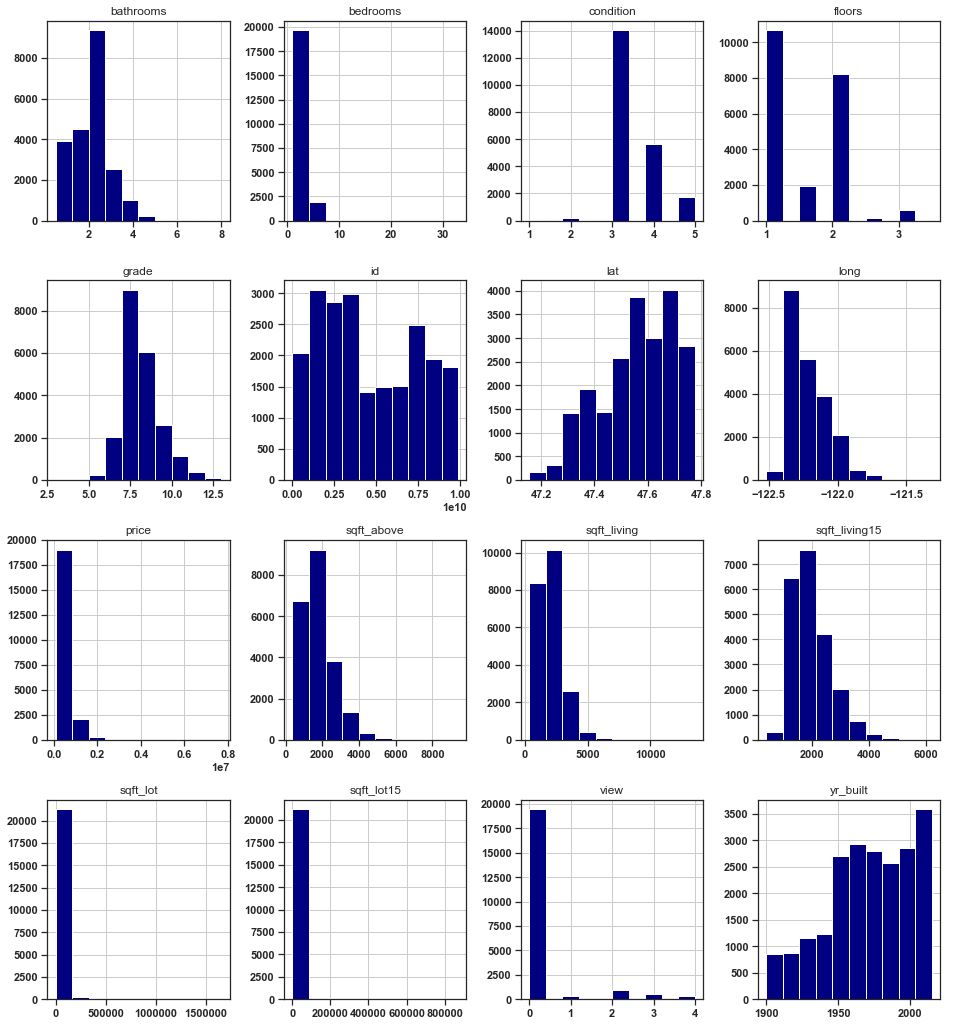

In [103]:
#VISUALISATION - Histograms of all features
df.hist(figsize=(16,18),color='navy');

* columns such as bedrooms, price, sqft_lot, sqft_above, sqft_basement and sqft_lot15 seem to have some outliers
* columns condition, floors, grade, bathrooms, view and bathrooms look like categorical variables


### How are properties distributed across zipcodes?

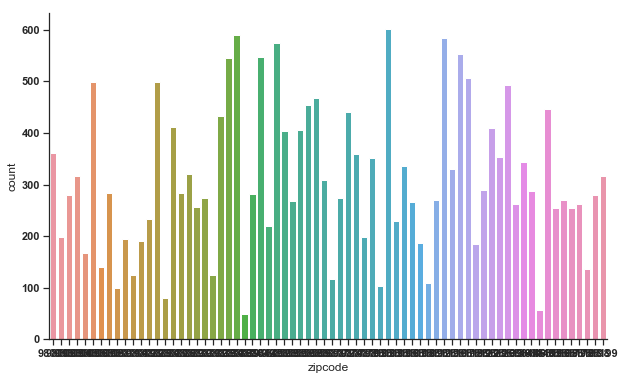

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(df['zipcode'])
sns.despine();

* properties in zipocdes are not evenly distributed, but that was to be expected
* no zipcode category contains more than 600 houses

## Removing Outliers 

I will now remove outliers from the dataset. Not removing outliers could skew the distribution of the data too much and decrease the realiability of the model.
I will do this by looking at scatter plot and then removing the appropriate number of outliers.

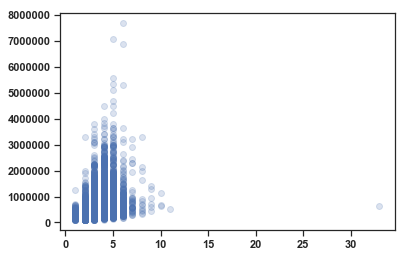

In [107]:
# Bedrooms
plt.scatter(df.bedrooms,df.price, alpha = 0.2)
plt.show()

In [110]:
df.describe()
#there is only one house that has more than 15 bedrooms. I will remove this row from the data
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


In [111]:
#I will remove this house from the dataset
df = df.drop([15856])

In [113]:
#Price

#there are only 7 houses sold for more than $5 000 000
#let's have a look at them
df.loc[df.price > 5000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,2,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,3,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,4,3,13,8860,1030.0,2001,not renovated,98039,47.6305,-122.240,4540,42730


In [115]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])
df = df.drop([1162])
df = df.drop([1313])
df = df.drop([1446])
df = df.drop([4407])


KeyError: '[3910] not found in axis'

In [124]:
#sqft_living

df.loc[df.sqft_living > 8000]
#There are only 4 properties with sgft_living value above 8000 sqft
#The value of the largest property is $2,280,000
#I will remove this property from the dataset


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,5110000.0,5,5.25,8010,45517,2.0,4,3,12,5990,2020.0,1999,not renovated,98033,47.6767,-122.211,3430,26788
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,3,13,6200,3000.0,2001,not renovated,98039,47.6289,-122.233,3560,24345


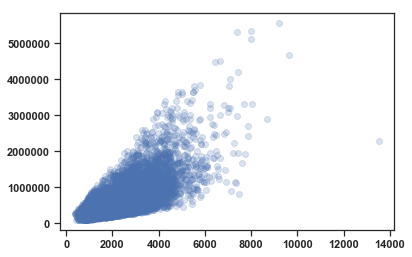

In [117]:
plt.scatter(df.sqft_living,df.price, alpha = 0.2)
plt.show()

In [118]:
df = df.drop([12764])
df = df.drop([8085])
df = df.drop([18288])
df = df.drop([14542])

In [125]:
#Basement
df.loc[df.sqft_basement > 3000]
# there are only 2 properties with basement larget than 3000 sqft
# I will remove them from the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10074,7767000060,1900000.0,5,4.25,6510,16471,2.0,3,4,11,3250,3260.0,1980,not renovated,98040,47.5758,-122.242,4480,16471
15468,624069108,3200000.0,4,3.25,7000,28206,1.0,4,4,12,3500,3500.0,1991,not renovated,98075,47.5928,-122.086,4913,14663


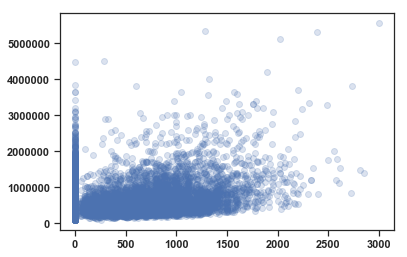

In [128]:
plt.scatter(df.sqft_basement,df.price, alpha = 0.2)
plt.show()

In [129]:
df = df.drop([10074])
df = df.drop([15468])

KeyError: '[10074] not found in axis'

In [130]:
#sqft_lot
#there are only 4 properties with lots larget than 1 000 000 sqft
df.loc[df.sqft_lot > 1000000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,700000.0,4,1.00,1300,1651359,1.0,3,4,6,1300,0.0,1920,not renovated,98022,47.2313,-122.023,2560,425581
7640,2623069031,542500.0,5,3.25,3010,1074218,1.5,0,5,8,2010,1000.0,1931,not renovated,98027,47.4564,-122.004,2450,68825
7762,2323089009,855000.0,4,3.50,4030,1024068,2.0,0,3,10,4030,0.0,2006,not renovated,98045,47.4619,-121.744,1830,11700
17305,3326079016,190000.0,2,1.00,710,1164794,1.0,0,2,5,710,0.0,1915,not renovated,98014,47.6888,-121.909,1680,16730


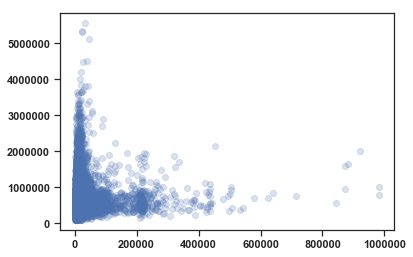

In [133]:
plt.scatter(df.sqft_lot,df.price, alpha = 0.2)
plt.show()

In [132]:
df = df.drop([1717])
df = df.drop([7640])
df = df.drop([7762])
df = df.drop([17305])

In [136]:
#sqft_lotassert15

# there are only 3 properties with lot15 larger than 500 000 sqft
df.loc[df.sqft_lot15 > 500000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,937500.0,4,4.0,5545,871200,2.0,0,3,11,3605,1940.0,2003,not renovated,98014,47.6760,-121.882,3420,871200
13451,3420069060,790000.0,3,2.5,2640,432036,1.5,3,3,10,2640,0.0,1996,not renovated,98022,47.1795,-122.036,1500,560617
20436,1125079111,1600000.0,4,5.5,6530,871200,2.0,2,3,11,6530,0.0,2008,not renovated,98014,47.6640,-121.878,1280,858132


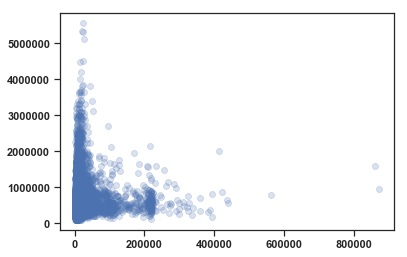

In [137]:
plt.scatter(df.sqft_lot15,df.price, alpha = 0.2)
plt.show()

In [138]:
df = df.drop([9705])
df = df.drop([13451])
df = df.drop([20436])

###  Checking for multicollinearity

I will not check the collinearity between all values. Multicollinear information can negatively impact the model by weakening the precision of the final coefficients.

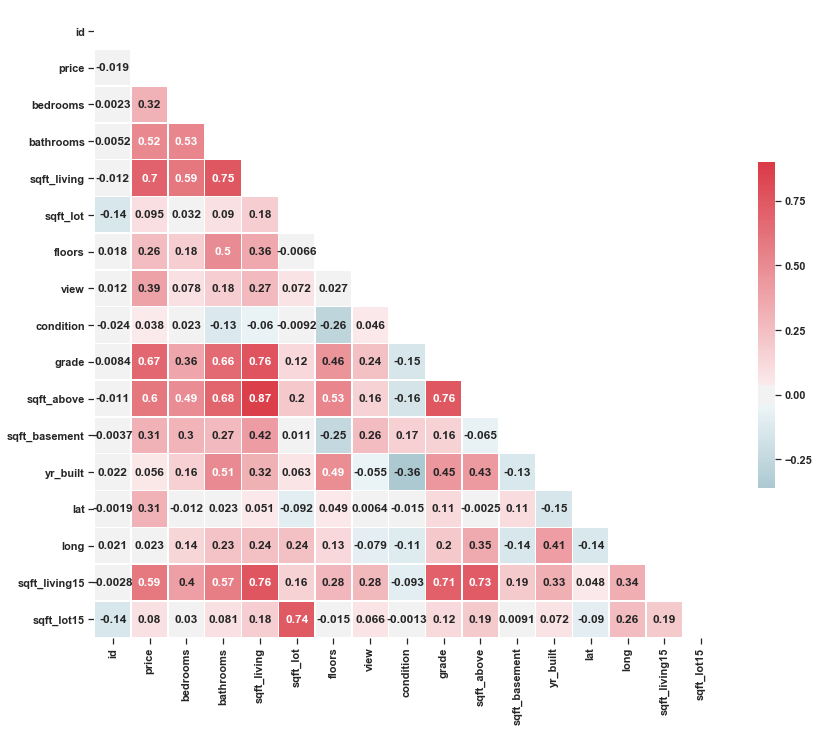

In [139]:
sns.set(style="ticks")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

In [35]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# looking at the 5 point statistics, their values seems to be roughly similar, they indeed look they describe the same
print(df.sqft_living.describe())
print(df.sqft_above.describe())

count    21576.000000
mean      2075.702911
std        900.106965
min        370.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max       7880.000000
Name: sqft_living, dtype: float64
count    21576.000000
mean      1785.424592
std        817.852595
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       7880.000000
Name: sqft_above, dtype: float64


In [140]:
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

# I will also drop the ID column, as it won't be needed any further
df = df.drop('id',axis=1)

## 3) Feature engineering - normalising values and preparation for modelling

In this important section of the project I prerared the data for modelling. This has been an interative process. I have experimented with log-transorming and normalising the data. At the end, I have decided to only log-tranform my target value, as it provided the most powerful model for the scope of this project. 

In [37]:
#Log transforming data

#df.sqft_living = np.log(df.sqft_living)
#df.sqft_lot = np.log(df.sqft_lot)

#df.sqft_living15 = np.log(df.sqft_living15)
#df.sqft_lot15 = np.log(df.sqft_lot15)

In [38]:
#Standardisation/Normalisation

#df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
#df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()

#df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
#df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()

In [141]:
#Log-transforming target variable
df.price = np.log(df.price)


### Testing assumptions for linear regression

Here I will have a look again at the distribution of all values in order to check for linearity and to confirm which values should be turned into categorical columns.

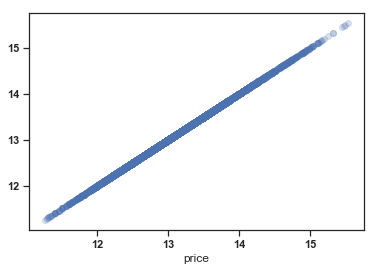

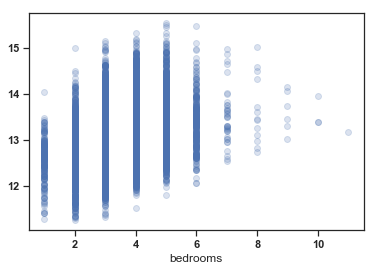

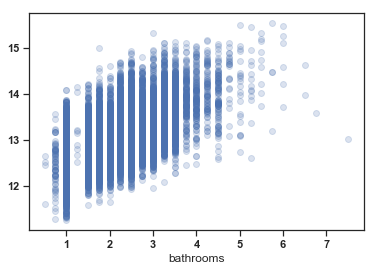

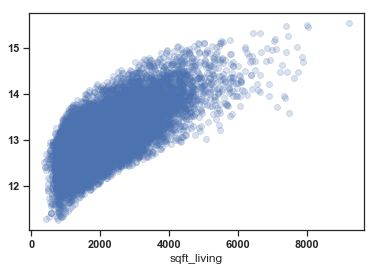

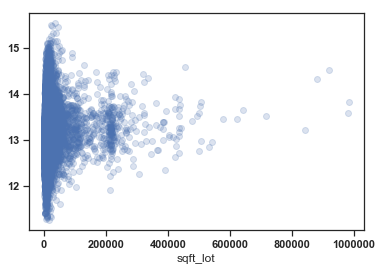

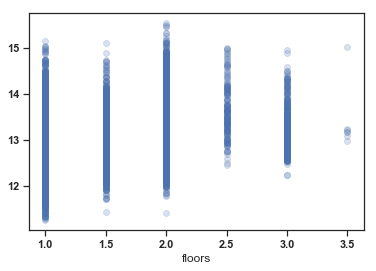

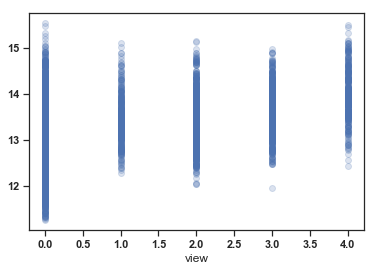

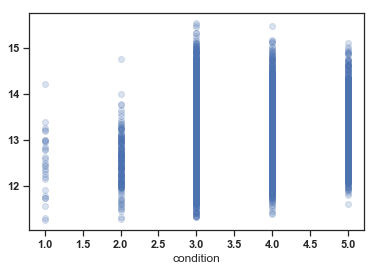

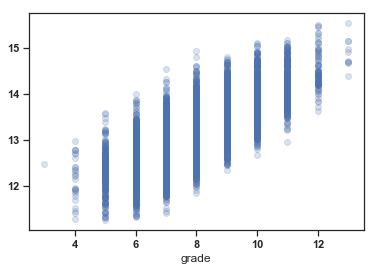

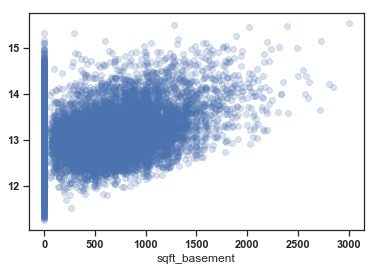

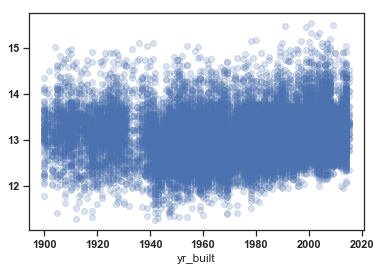

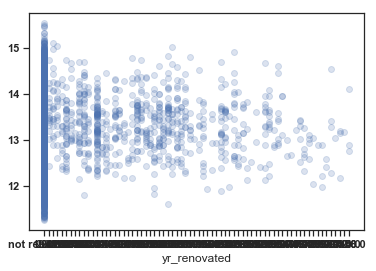

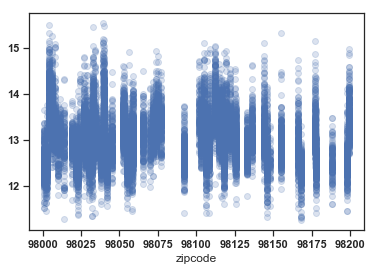

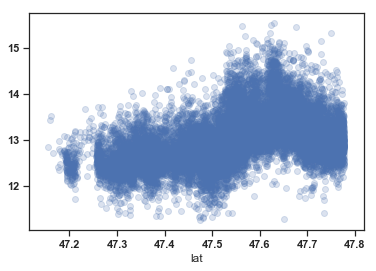

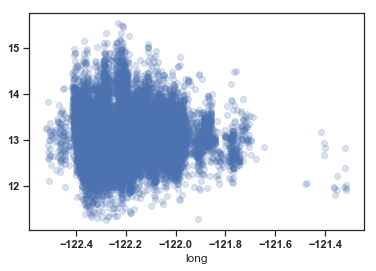

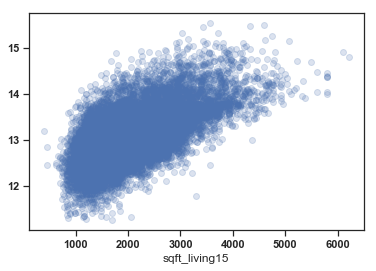

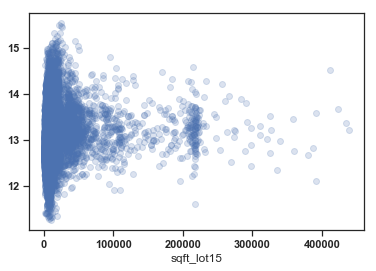

In [142]:
list_of_columns = list(df.columns)

for column in list_of_columns:
    plt.scatter(df[column],df.price, alpha =0.2)
    plt.xlabel(column)
    plt.show()

**Observations:**
* sqft_living does not seem very linear (exponential, perhaps?), also has some outliers
* sqft_basement will be a categotical variable, as there are too many 0 values for properties without basement
* the same applies for yr_renovated

Latitude:
* northern properties have generaly bigger value than southern
* peak between 47.55 and 47.65

Longitude does not have a linear relationship, value of properties peak at -122.2 and then decrease

## Preparing categorical variables

In [144]:
#I suspect these columns will be suitable for transformation into categorical.

for var in ['bedrooms','bathrooms','floors','view','condition','grade']:
    print (df[var].value_counts())

3     9823
4     6877
2     2759
5     1595
6      270
1      196
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
2.50    5376
1.00    3849
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     730
3.25     587
3.75     155
4.00     135
4.50      99
4.25      78
0.75      71
4.75      23
5.00      21
5.25      13
5.50       9
1.25       9
6.00       6
5.75       4
0.50       4
6.50       2
7.50       1
6.75       1
Name: bathrooms, dtype: int64
1.0    10668
2.0     8227
1.5     1908
3.0      610
2.5      160
3.5        7
Name: floors, dtype: int64
0    19479
2      955
3      504
1      330
4      312
Name: view, dtype: int64
3    14010
4     5673
5     1699
2      169
1       29
Name: condition, dtype: int64
7     8973
8     6064
9     2615
6     2037
10    1132
11     394
5      241
12      86
4       27
13      10
3        1
Name: grade, dtype: int64


Columns condition, view, floors are distributed within less than 7 numbers - I will simply turn them into categories.
I will also do the same for the zipcode column.

In [145]:
#changing column type
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.floors = df.floors.astype('category')

#creating dummy columns
condition_dummies = pd.get_dummies(df.condition,prefix='cond')
view_dummies = pd.get_dummies(df.view,prefix='view')
floors_dummies = pd.get_dummies(df.floors,prefix='flo')
zipcode_dummies = pd.get_dummies(df.zipcode,prefix='zip')

#removing original columns
df = df.drop(["condition","view","floors","zipcode"], axis=1)

#adding dummy columns
df = pd.concat([df, condition_dummies, view_dummies, floors_dummies, zipcode_dummies], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21596
Data columns (total 99 columns):
price            21580 non-null float64
bedrooms         21580 non-null int64
bathrooms        21580 non-null float64
sqft_living      21580 non-null int64
sqft_lot         21580 non-null int64
grade            21580 non-null int64
sqft_basement    21580 non-null float64
yr_built         21580 non-null int64
yr_renovated     21580 non-null object
lat              21580 non-null float64
long             21580 non-null float64
sqft_living15    21580 non-null int64
sqft_lot15       21580 non-null int64
cond_1           21580 non-null uint8
cond_2           21580 non-null uint8
cond_3           21580 non-null uint8
cond_4           21580 non-null uint8
cond_5           21580 non-null uint8
view_0           21580 non-null uint8
view_1           21580 non-null uint8
view_2           21580 non-null uint8
view_3           21580 non-null uint8
view_4           21580 non-null uint8
flo_1.

#### turning yr_renovated into numerical column

In [146]:
#I am replacing the 'not renovated' values into the corresponding 'yr_built value'.
#This columns now represent the age of the house taking into consideration renovations
#The Pearson's correlation coefficient is now 0.93! I will drop the 'yr_built' category now.
df.yr_renovated.value_counts()
df.loc[df.yr_renovated == 'not renovated','yr_renovated'] = df['yr_built']
df.yr_renovated = df.yr_renovated.astype('float64')

In [147]:
df = df.drop('yr_built', axis = 1)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


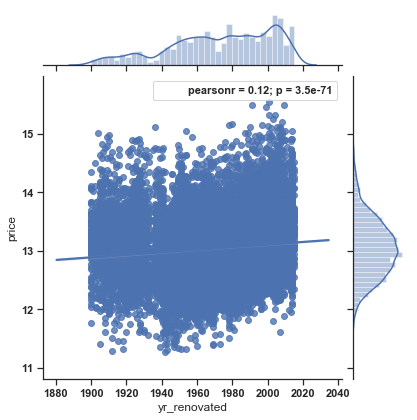

In [148]:
from scipy.stats import pearsonr
sns.jointplot(x='yr_renovated', y='price', data=df, kind = 'reg', stat_func=pearsonr)

#### Binning selected variables and creating more categorical columns

In the following cells I will prepare columns 'bedrooms', 'bathrooms', 'grade', 'yr_renovated' and 'sqft_basement'. I will create appropriate bins and then turn the values into categories. 

In [154]:
df.bedrooms = df.bedrooms.astype('float64')
df.grade = df.grade.astype('float64')

bedrooms_bins = [0,2,3,4,5,11]
bathrooms_bins = [0,1,2,3,4,5,8]
grade_bins = [0,6,7,8,9,10,11,14]

yr_renovated_bins = [1900,1920,1940,1960,1980,2000,2010,2020]
sqft_basement_bins = [0,500,1000,6000]

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [151]:
# using pd.cut
bins_bedrooms = pd.cut(df['bedrooms'], bedrooms_bins)
bins_bathrooms = pd.cut(df['bathrooms'], bathrooms_bins)
bins_grade = pd.cut(df['grade'], grade_bins)


bins_yr_renovated = pd.cut(df['yr_renovated'], yr_renovated_bins)
bins_sqft_basement = pd.cut(df['sqft_basement'], sqft_basement_bins)

In [152]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_grade = bins_grade.cat.as_unordered()

bins_yr_renovated = bins_yr_renovated.cat.as_unordered()
bins_sqft_basement = bins_sqft_basement.cat.as_unordered()

In [153]:
# replace the existing columns
df['bedrooms']=bins_bedrooms
df['bathrooms']=bins_bathrooms
df['grade']=bins_grade


df['yr_renovated']=bins_yr_renovated
df['sqft_basement'] = bins_sqft_basement

In [155]:
#label encoding

df['bedrooms'] = df['bedrooms'].cat.codes
df['bathrooms'] = df['bathrooms'].cat.codes
df['grade'] = df['grade'].cat.codes

df['yr_renovated'] = df['yr_renovated'].cat.codes

df['sqft_basement'] = df['sqft_basement'].cat.codes

In [156]:
#CREATING DUMMY VARIABLES

bathrooms_dummy = pd.get_dummies(df['bathrooms'], prefix="bath")
bedrooms_dummy = pd.get_dummies(df['bedrooms'], prefix="bed")
grade_dummy = pd.get_dummies(df['grade'], prefix="grade")


yr_renovated_dummy = pd.get_dummies(df['yr_renovated'], prefix="reno")
sqft_basement_dummy = pd.get_dummies(df['sqft_basement'], prefix= "base")

In [157]:
add_series = [df,bathrooms_dummy, bedrooms_dummy, grade_dummy, sqft_basement_dummy,yr_renovated_dummy]
df = pd.concat(add_series, axis=1)

In [158]:
#removing original columns
df = df.drop(["bedrooms","bathrooms","grade", "yr_renovated","sqft_basement"], axis=1)


In [159]:
#RENAMING FLOORS COLUMNS - this code has been added after modelling as some column names were not suitable for processing
df = df.rename(columns={'flo_1.0': 'flo10','flo_1.5': 'flo15','flo_2.0': 'flo20','flo_2.5': 'flo25','flo_3.0': 'flo30','flo_3.5': 'flo35'})
df = df.rename(columns={'base_-1':'baseminus1','base_0':'base0','base_1':'base1','base_2':'base2'})
df = df.rename(columns={'reno_-1':'renominus1','reno_0':'reno0','reno_1':'reno1','reno_2':'reno2','reno_3':'reno3','reno_4':'reno4','reno_5':'reno5','reno_6':'reno6'})
df = df.rename(columns={'bed_-1':'bedminus1'})


In [160]:
df = df.drop('cond_5',axis=1)
df = df.drop('view_4',axis=1)
df = df.drop('flo35',axis=1)
df = df.drop('bath_5',axis=1)
df = df.drop('bed_4',axis=1)
df = df.drop('grade_6',axis=1)
df = df.drop('base2',axis=1)
df = df.drop('reno6',axis=1)

# 4) Modeling Data

In this section I will perform feature selection and then build mutliple models and compare them.

This is record of the various R-squared values as I iteratively adjusted values for modelling
* intial run (outliers removed) - 0.824, 0.823
* with outliers - 0.816, 0.815
*  after removing houses above £5 mil - 0.826,0.825
*  after transforming target variable - 0.885, 0.885
*  without creating cat variables - 0.879
* without zipcodes - 0.775

In [161]:
# dropping these variables imporoved the distributions of my residual errors

df = df.drop('long', axis =1)
df = df.drop('lat', axis = 1)

## Model 1

I will build my regression models in statsmodels.

In [162]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [163]:
model_1 = ols(formula= formula, data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1393.
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:35:56   Log-Likelihood:                 6004.4
No. Observations:               21580   AIC:                        -1.178e+04
Df Residuals:                   21468   BIC:                        -1.089e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.8505      0.081    159.331      0.000      12.692      13.009
sqft_living       0.0002   3.61e-06     59.834      0.000       0.000       0.000
sqft_lot       8.583e-07   5.16e-08     16.649      0.000    7.57e-07    9.59e-07
sqft_living15  7.166e-05   3.38e-06     21.179      0.000     6.5e-05    7.83e-05
sqft_lot15     1.395e-08   7.66e-08      0.182      0.855   -1.36e-07    1.64e-07
cond_1           -0.4001      0.035    -11.538      0.000      -0.468      -0.332
cond_2           -0.2353      0.015    -15.683      0.000      -0.265      -0.206
cond_3           -0.1084      0.005    -20.848      0.000      -0.119      -0.098
cond_4           -0.0580      0.005    -11.148      0.000      -0.068      -0.048
view_0           -0.4892      0.011    -44.250      0.000      -0.511      -0.468
view_1           -0.3664      0.015    -24.893      0.000      -0.395      -0.338
view_2           -0.3757      0.012    -30.815      0.000      -0.400      -0.352
view_3           -0.2984      0.013    -22.311      0.000      -0.325      -0.272
flo10             0.1449      0.070      2.073      0.038       0.008       0.282
flo15             0.1420      0.070      2.030      0.042       0.005       0.279
flo20             0.0974      0.070      1.396      0.163      -0.039       0.234
flo25             0.1053      0.071      1.478      0.139      -0.034       0.245
flo30            -0.0078      0.070     -0.112      0.911      -0.145       0.129
zip_98001        -0.2843      0.010    -28.965      0.000      -0.304      -0.265
zip_98002        -0.3110      0.013    -23.720      0.000      -0.337      -0.285
zip_98003        -0.2635      0.011    -23.767      0.000      -0.285      -0.242
zip_98004         0.8343      0.011     78.737      0.000       0.814       0.855
zip_98005         0.4620      0.014     32.230      0.000       0.434       0.490
zip_98006         0.3448      0.009     39.806      0.000       0.328       0.362
zip_98007         0.3849      0.015     24.870      0.000       0.355       0.415
zip_98008         0.3829      0.011     34.568      0.000       0.361       0.405
zip_98010        -0.0409      0.018     -2.224      0.026      -0.077      -0.005
zip_98011         0.1663      0.013     12.584      0.000       0.140       0.192
zip_98014         0.0168      0.017      0.995      0.320      -0.016       0.050
zip_98019         0.0318      0.013      2.354      0.019       0.005       0.058
zip_98022        -0.2585      0.012    -20.820      0.000      -0.283      -0.234
zip_98023        -0.3064      0.008    -36.110      0.000      -0.323      -0.290
zip_98024         0.1261      0.021      6.084      0.000       0.085       0.167
zip_98027         0.2224      0.009     23.977      0.000       0.204       0.241
zip_98028         0.1321      0.011     12.022   

This model has a high R-squared and good validation results, as shown below.
The problem of this model are its residual errors distribution.

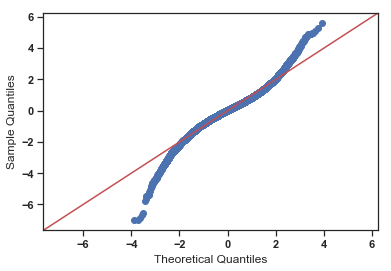

In [164]:
# Normality assumption

residuals = model_1.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)


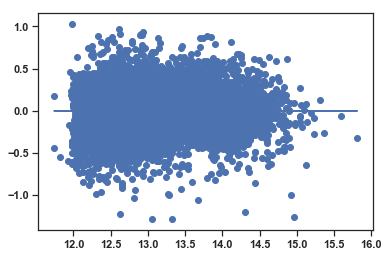

In [165]:
x_cols = df.columns
plt.scatter(model_1.predict(df[x_cols]), model_1.resid)
plt.plot(model_1.predict(df[x_cols]), [0 for i in range(len(df))])


## Model 2

For my second model I will try dropping the zipcode categories to improve the residuals of model 1

In [166]:
zipcode_cat = df.columns[18:90]
df_2 = df.drop(zipcode_cat, axis=1)

In [167]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df_2.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula_2 = outcome + "~" + pred_sum

In [168]:
model_2 = ols(formula=formula_2, data=df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1012.
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:37:37   Log-Likelihood:                -5289.2
No. Observations:               21580   AIC:                         1.066e+04
Df Residuals:                   21539   BIC:                         1.099e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.7655      0.127    108.125      0.000      13.516      14.015
sqft_living       0.0002   5.82e-06     28.681      0.000       0.000       0.000
sqft_lot       3.258e-07   8.61e-08      3.782      0.000    1.57e-07    4.95e-07
sqft_living15     0.0001   5.31e-06     20.655      0.000    9.92e-05       0.000
sqft_lot15    -4.613e-07   1.25e-07     -3.698      0.000   -7.06e-07   -2.17e-07
cond_1           -0.3453      0.058     -5.929      0.000      -0.459      -0.231
cond_2           -0.2891      0.025    -11.494      0.000      -0.338      -0.240
cond_3           -0.1219      0.009    -14.231      0.000      -0.139      -0.105
cond_4           -0.0723      0.009     -8.312      0.000      -0.089      -0.055
view_0           -0.3988      0.018    -21.814      0.000      -0.435      -0.363
view_1           -0.2435      0.025     -9.882      0.000      -0.292      -0.195
view_2           -0.3134      0.020    -15.375      0.000      -0.353      -0.273
view_3           -0.2747      0.022    -12.264      0.000      -0.319      -0.231
flo10            -0.1996      0.117     -1.700      0.089      -0.430       0.031
flo15            -0.1316      0.118     -1.119      0.263      -0.362       0.099
flo20            -0.1781      0.117     -1.519      0.129      -0.408       0.052
flo25            -0.0998      0.120     -0.833      0.405      -0.334       0.135
flo30            -0.0002      0.118     -0.002      0.999      -0.231       0.231
bath_2            0.0144      0.007      2.209      0.027       0.002       0.027
bath_3            0.0776      0.011      6.751      0.000       0.055       0.100
bath_4            0.0863      0.024      3.569      0.000       0.039       0.134
bed_0             0.0736      0.020      3.698      0.000       0.035       0.113
bed_1             0.0222      0.019      1.198      0.231      -0.014       0.059
bed_2             0.0040      0.018      0.222      0.824      -0.032       0.040
bed_3            -0.0004      0.019     -0.021      0.984      -0.038       0.037
grade_0          -1.0620      0.038    -28.196      0.000      -1.136      -0.988
grade_1          -0.7637      0.036    -20.989      0.000      -0.835      -0.692
grade_2          -0.5590      0.036    -15.711      0.000      -0.629      -0.489
grade_3          -0.3682      0.035    -10.600      0.000      -0.436      -0.300
grade_4          -0.2262      0.034     -6.586      0.000      -0.294      -0.159
grade_5          -0.1372      0.036     -3.841      0.000      -0.207      -0.067
baseminus1       -0.0661      0.010     -6.608      0.000      -0.086      -0.046
base0             0.0336      0.011      2.973      0.003       0.011       0.056
base1             0.0197      0.010      2.063      0.039       0.001       0.038
renominus1        0.3857      0.038     10.206   

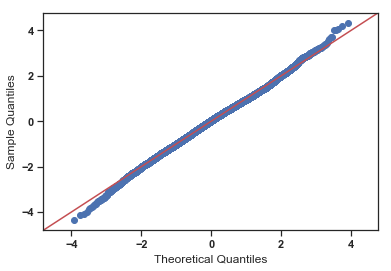

In [169]:
residuals = model_2.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)

#this model has greatly improved the residuals, but it's R-squared is now much lower

## Model 3

For my third model I will go back to model one, but I will remove variables with inflated coefficients
This model will include the zipcode information again

In [170]:
df_3 = df
df_3 = df_3.drop('sqft_living15', axis = 1)
df_3 = df_3.drop('sqft_lot15', axis = 1)
#df_3 = df_3.drop('sqft_lot', axis = 1)
#df_3 = df_3.drop('sqft_living', axis = 1)

# I will also drop the some of the floor variables due to their high p-values
df_3 = df_3.drop('flo20', axis = 1)
df_3 = df_3.drop('flo25', axis = 1)
df_3 = df_3.drop('flo30', axis = 1)

In [171]:
df_3 = df_3.drop('zip_98014', axis = 1)
df_3 = df_3.drop('zip_98010', axis = 1)

In [172]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df_3.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula_3 = outcome + "~" + pred_sum

In [173]:
model_3 = ols(formula= formula_3, data=df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1424.
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:38:13   Log-Likelihood:                 5686.7
No. Observations:               21580   AIC:                        -1.116e+04
Df Residuals:                   21474   BIC:                        -1.032e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.9762      0.046    280.072      0.000      12.885      13.067
sqft_living     0.0002   3.42e-06     72.274      0.000       0.000       0.000
sqft_lot     8.501e-07   3.88e-08     21.938      0.000    7.74e-07    9.26e-07
cond_1         -0.3779      0.035    -10.747      0.000      -0.447      -0.309
cond_2         -0.2317      0.015    -15.228      0.000      -0.262      -0.202
cond_3         -0.1025      0.005    -19.455      0.000      -0.113      -0.092
cond_4         -0.0554      0.005    -10.488      0.000      -0.066      -0.045
view_0         -0.5061      0.011    -45.325      0.000      -0.528      -0.484
view_1         -0.3667      0.015    -24.567      0.000      -0.396      -0.337
view_2         -0.3781      0.012    -30.581      0.000      -0.402      -0.354
view_3         -0.2956      0.014    -21.789      0.000      -0.322      -0.269
flo10           0.0557      0.005     12.172      0.000       0.047       0.065
flo15           0.0482      0.006      8.135      0.000       0.037       0.060
zip_98001      -0.2772      0.016    -17.237      0.000      -0.309      -0.246
zip_98002      -0.3179      0.018    -17.233      0.000      -0.354      -0.282
zip_98003      -0.2578      0.017    -15.175      0.000      -0.291      -0.225
zip_98004       0.8566      0.017     51.078      0.000       0.824       0.889
zip_98005       0.4863      0.019     25.005      0.000       0.448       0.524
zip_98006       0.3758      0.015     24.256      0.000       0.345       0.406
zip_98007       0.3973      0.020     19.498      0.000       0.357       0.437
zip_98008       0.3890      0.017     22.759      0.000       0.356       0.423
zip_98011       0.1891      0.019     10.218      0.000       0.153       0.225
zip_98019       0.0533      0.019      2.879      0.004       0.017       0.090
zip_98022      -0.2549      0.018    -14.466      0.000      -0.289      -0.220
zip_98023      -0.2958      0.015    -19.337      0.000      -0.326      -0.266
zip_98024       0.1360      0.024      5.576      0.000       0.088       0.184
zip_98027       0.2443      0.016     15.524      0.000       0.213       0.275
zip_98028       0.1468      0.017      8.652      0.000       0.114       0.180
zip_98029       0.3159      0.017     19.032      0.000       0.283       0.348
zip_98030      -0.2279      0.017    -13.185      0.000      -0.262      -0.194
zip_98031      -0.2008      0.017    -11.771      0.000      -0.234      -0.167
zip_98032      -0.3116      0.021    -14.783      0.000      -0.353      -0.270
zip_98033       0.5145      0.016     32.854      0.000       0.484       0.545
zip_98034       0.2755      0.015     18.183      0.000       0.246       0.305
zip_98038      -0.1098      0.015     -7.383      0.000      -0.139      -0.081
zip_98039       1.0413      0.030     34.79

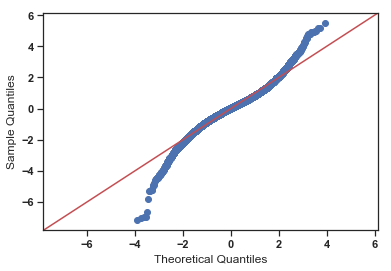

In [174]:
residuals = model_3.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)

# 5) Model Validation

In this last section I will validate my final selected model (model 3) by using various methods.
When using a train test split, we'll compare your residuals for both test set and training set
A big difference in value between the test and training set (R)MSE is an indication of overfitting

#### train-test-split with Scikit-learn

In [176]:
y = df_3[["price"]]
X = df_3.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

17264 4316 17264 4316


In [177]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#linreg.predict will create a new variable y_hat with contains the predicted house prices based on our 
#training and testing models

In [178]:
# this equation takes in the the differences between the predicted and the original value**2,
# divides them by the number of observations and sums them up = MSE
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('TRAIN Mean Squarred Error:', mse_train)
print('TEST Mean Squarred Error:', mse_test)

TRAIN Mean Squarred Error: price    0.034209
dtype: float64
TEST Mean Squarred Error: price    0.036336
dtype: float64


In [179]:
print('Difference between train and test MSE:', mse_test-mse_train)

Difference between train and test MSE: price    0.002128
dtype: float64


## cross-validation

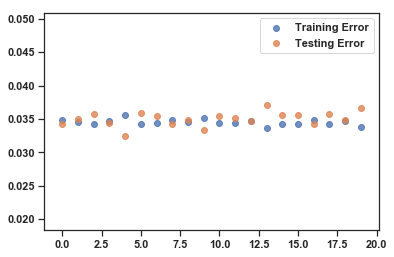

In [180]:
#The code below repeats a train-test-split creation n times
# each time a new random train-test-split is created

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error', alpha = 0.8)
plt.scatter(list(range(num)), test_err, label='Testing Error', alpha = 0.8)
plt.legend();

## K-fold cross validation

In [181]:
# I will now perform the K-fold cross validation, which takes in combinations of testing and training data
# across entire dataset. This way we test all data against its remaining data.
# Cross-validation MSE = average of individual results

from sklearn.model_selection import cross_val_score

cross_val_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))


In [182]:
k_fold_result = abs(cross_val_results)

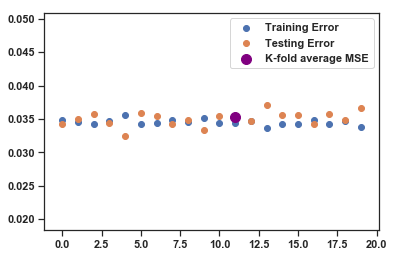

In [183]:
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.scatter(11,k_fold_result,color='purple', label = 'K-fold average MSE',s=100)
plt.legend();                                   


## Visualising for presentation

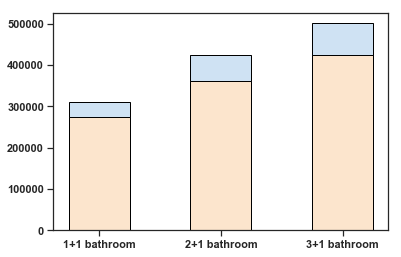

In [184]:
# libraries
from matplotlib import rc

 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [273000,360000,425000]
bars2 = [38000,65000,76000]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['1+1 bathroom','2+1 bathroom','3+1 bathroom']
barWidth = 0.5
 
# Create bars
plt.bar(r, bars1, color='#fce5cdff', edgecolor='black', width=barWidth, label='Median house price')
# Createbars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#cfe2f3ff', edgecolor='black', width=barWidth, label="Potential added value ")

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')


 
# Show graphic
plt.show()

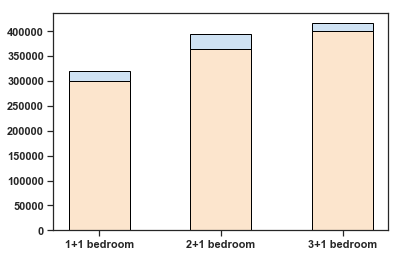

In [185]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [299000,365000,400000]
bars2 = [21000,29000,16000]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['1+1 bedroom','2+1 bedroom','3+1 bedroom']
barWidth = 0.5
 
# Create bars
plt.bar(r, bars1, color='#fce5cdff', edgecolor='black', width=barWidth, label='Median house price')
# Createbars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#cfe2f3ff', edgecolor='black', width=barWidth, label="Potential added value ")

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')


 
# Show graphic
plt.show()